# Convolutional Neural Network.

## Image Recognition (Binary).

#### Importing the Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.options.display.max_columns=30
pd.options.display.max_rows=100

In [2]:
import tensorflow as tf
#import keras as ks

from keras.preprocessing.image import ImageDataGenerator
# This is helpful for preprocessing of images.

Using TensorFlow backend.


In [3]:
# To check version of tensorflow.
tf.__version__

'1.15.0'

## Part-1 Data Preprocessing.

### Preprocessing of Training set.

In [4]:
# Applying different "Transformations" or combinations for images to avoid 'Overfitting'. We us geometrical transformations or some zooms or some rotations on our images like 'Image Augmentation'.
# Image Augmentation helps in transforming the images of our training to avoid overfitting.
# It creates an object/instance as 'train_datagen' of "Image Data Generator" class which represents the tool which applies all the transformations on the images of the training set. 
# It's capturing 'INVARIANCE' by creating more images.

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Rescale: This is feature scaling of our each and every single one of our pixels by dividing thier value with 255.Because each pixel takes a value in between 0 & 255.
# With this we get all the pixel values in between 0 & 1 as Normalization. Feature Scaling is very important for 'Neural Networks'.
# Zoom range: Zooming in or zooming out on the images.
# Horizontal flip: It consists of flipping of images horizontally.
# Shear range: Its type of transaction.

In [5]:
# Importing training set by accessing it from directory and at the same time creating these batches and resizing the images, to reduce the computations of the machines i.e to make it less  compute intensive.
# Flow_From_Directory: To access the training set from our directory.

train_set = train_datagen.flow_from_directory('training_set', target_size=(64, 64), batch_size=32, class_mode='binary')

# Target_size: Final size of the images when we feed into the CNN. If we increase this the training time also increases.
# Batch size: Number of images we need in each batch. Default is 32.
# Class_mode: This specifies whether the target is binary('cat' or 'dog') or non-binary.

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set.

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255) 
# Here in 'ImageDataGenerator' we are not adding any arguments or transformations since its the test data. Therefore we just rescale it and keep it in original state.

test_set = test_datagen.flow_from_directory('test_set', target_size=(64,64), batch_size=32, class_mode='binary') # Same as training set.


Found 2000 images belonging to 2 classes.


##  Part-2 Building the CNN.

In [7]:
# Initializing the CNN by creating a variable using Sequential class.

cnn=tf.keras.models.Sequential()

#### Step-1 Convolution.

In [8]:
# Convolution with add method.
# Adding feature detector or kernal or filter to the convolution.
# Convolution Layer is an object of 'Conv2D' class, an dense class which allows to bulid the fully connected layer.

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3])) 

# Filters(kernals): Number of feature detectors required to apply for our images.
# Kernal_size: This is the size of that feature detector i.e the number of rows and number of columns.
# Input shape: Since we are using color images i.e RGB color and we reshaped it into 64,64;therefore we have to use [64,64,3]. 3 is used for RGB and 1 is used for Black & white.
# Input_shape is only given for the first layer of CNN.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Step-2 Pooling.

In [9]:
# Adding Max_Pooling layer to our CNN.
# using MaxPool2D class.
# Pool_size: 2 is used i.e 2X2 Matrix.
# Strides: Sliding 2X2 pixels i.e to what number of pixels is the frame is shifted.
# Padding: With padding =valid; we just ignore last 2 cells of empty matrix during strides.With Padding it does'nt give much effect on the model. 

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding 2nd Convolution Layer.

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# Remove 'input_shape' because we are adding 2nd Conv Layer. 

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


#### Step-3 Flattening.

In [11]:
# Result of convolution and pooling is flattened.

cnn.add(tf.keras.layers.Flatten())

#### Step-4 Full Connection.

In [12]:

cnn.add(tf.keras.layers.Dense(units=128, activation='relu',))

# Units: No of Hidden Neurons in the fully connected layer.
# We took large number of neurons since its complex problem.

#### Step-5 Output Layer.

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Units will be 1 i.e Binary classification Prediction
# Activation function will be 'sigmoid' for output layer.


## Part-3 Training the CNN.

#### Compiling the CNN.

In [14]:
# Compile is the method which takes as inputs.
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# In complier we have to enter 3 parameters i.e 1.Optimizer,  2.Loss Function and 3.Metrics. 

# Adam Optimizer: To get Stochastic Optimizer, Optimizer updates the weights through 'Stochastic Gradient Descent'.
# Loss function: For Binary classification it should be 'binary_ crossentropy' and for non-binary it should be 'categorical_crossentropy'
# Metrics: 'Accuracy' 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Training the CNN on the 'train_set' and evaluating it on the 'test_set'


In [15]:
# In fit method we  give different parameters i.e train_set and test_set for validating and epochs.
cnn.fit(x=train_set, validation_data=test_set, epochs= 25)

Epoch 1/25
250/250 [==============================] - 203s 814ms/step - loss: 0.6520 - acc: 0.6101 - val_loss: 0.6163 - val_acc: 0.6490
Epoch 2/25
250/250 [==============================] - 105s 420ms/step - loss: 0.5900 - acc: 0.6831 - val_loss: 0.5675 - val_acc: 0.7100
Epoch 3/25
250/250 [==============================] - 105s 421ms/step - loss: 0.5534 - acc: 0.7084 - val_loss: 0.5343 - val_acc: 0.7360
Epoch 4/25
250/250 [==============================] - 106s 425ms/step - loss: 0.5225 - acc: 0.7321 - val_loss: 0.5287 - val_acc: 0.7430
Epoch 5/25
250/250 [==============================] - 104s 417ms/step - loss: 0.4930 - acc: 0.7577 - val_loss: 0.5017 - val_acc: 0.7535
Epoch 6/25
250/250 [==============================] - 105s 419ms/step - loss: 0.4677 - acc: 0.7781 - val_loss: 0.4706 - val_acc: 0.7765
Epoch 7/25
250/250 [==============================] - 105s 420ms/step - loss: 0.4549 - acc: 0.7803 - val_loss: 0.4523 - val_acc: 0.7900
Epoch 8/25
250/250 [============================

## Part-4 Making a single prediction.

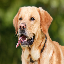

In [16]:
# Deploying our CNN on each of these single images & Deploying CNN in Production on a single observation.

from keras.preprocessing import image 

# To load image as a variable.

test_image= image.load_img('cat_or_dog_1.jpg', target_size=(64,64))
# target_size should be same as used in training_set.
test_image

In [17]:
# Converting PIL image format into an 2-d array.Because predict method uses input as an array.
test_image=image.img_to_array(test_image)
test_image

array([[[ 54.,  58.,   7.],
        [ 58.,  63.,   9.],
        [ 64.,  67.,  10.],
        ...,
        [136., 144.,  71.],
        [140., 150.,  77.],
        [139., 149.,  78.]],

       [[ 48.,  54.,   6.],
        [ 51.,  58.,   7.],
        [ 58.,  63.,   9.],
        ...,
        [129., 137.,  64.],
        [139., 149.,  78.],
        [141., 151.,  80.]],

       [[ 48.,  56.,   7.],
        [ 48.,  56.,   7.],
        [ 54.,  61.,  10.],
        ...,
        [123., 130.,  63.],
        [136., 145.,  80.],
        [140., 149.,  82.]],

       ...,

       [[ 46.,  55.,  12.],
        [ 42.,  50.,   9.],
        [ 38.,  49.,   9.],
        ...,
        [239., 205., 170.],
        [235., 209., 186.],
        [229., 202., 173.]],

       [[ 50.,  57.,  15.],
        [ 42.,  50.,   9.],
        [ 44.,  52.,  11.],
        ...,
        [234., 200., 162.],
        [236., 206., 178.],
        [234., 203., 174.]],

       [[ 53.,  59.,  13.],
        [ 43.,  51.,  10.],
        [ 49.,  

In [18]:
# Adding extra dimension.
# Since our images are trained in batches of images. Hence we need to add an extra dimension using numpy array.
test_image=np.expand_dims(test_image, axis=0)
# axis=0(where we are adding), Because we are adding our dimension of the batch adding to our image will be first dimension.
test_image

array([[[[ 54.,  58.,   7.],
         [ 58.,  63.,   9.],
         [ 64.,  67.,  10.],
         ...,
         [136., 144.,  71.],
         [140., 150.,  77.],
         [139., 149.,  78.]],

        [[ 48.,  54.,   6.],
         [ 51.,  58.,   7.],
         [ 58.,  63.,   9.],
         ...,
         [129., 137.,  64.],
         [139., 149.,  78.],
         [141., 151.,  80.]],

        [[ 48.,  56.,   7.],
         [ 48.,  56.,   7.],
         [ 54.,  61.,  10.],
         ...,
         [123., 130.,  63.],
         [136., 145.,  80.],
         [140., 149.,  82.]],

        ...,

        [[ 46.,  55.,  12.],
         [ 42.,  50.,   9.],
         [ 38.,  49.,   9.],
         ...,
         [239., 205., 170.],
         [235., 209., 186.],
         [229., 202., 173.]],

        [[ 50.,  57.,  15.],
         [ 42.,  50.,   9.],
         [ 44.,  52.,  11.],
         ...,
         [234., 200., 162.],
         [236., 206., 178.],
         [234., 203., 174.]],

        [[ 53.,  59.,  13.],
       

In [19]:
result= cnn.predict(test_image)
# This predict gives 0 or 1 as output, but we need in form of 'Cat' or 'Dog'

train_set.class_indices
# Using class_indices attribute, it figures out to classify what is 0 and what is 1 respectively.  

# 1 is Dog and 0 is Cat
if result[0][0] ==1:#[0] is batch and [0] is first element of the batch 
    prediction='DOG'
else:
    prediction='CAT'

print(prediction)

DOG


In [20]:
print(prediction)

DOG


### Testing External Data.

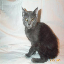

In [21]:
from keras.preprocessing import image 

test_image= image.load_img('cat.4014.jpg', target_size=(64,64))
test_image

In [22]:
test_image=image.img_to_array(test_image)

# Adding extra dimension.
test_image=np.expand_dims(test_image, axis=0)

result= cnn.predict(test_image)

train_set.class_indices

# 1 is Dog and 0 is Cat
if result[0][0] ==1:
    prediction='DOG'
else:
    prediction='CAT'

print(prediction)

CAT
